# Basic Overview 
The primary objective is to visualize and analyze the the teen birth rate data in USA for the years 2003-2015.

Comments/criticisms/appreciations are greatly accepted and appreciated. Do not be shy and send me an email at babinu@gmail.com !

Source of data : https://data.cdc.gov/api/views/3h58-x6cd/rows.csv?accessType=DOWNLOAD

In [1]:
# Section for importing relevant modules. Note that in order to increase readability , we will be importing necessary
# modules only as and when it is needed, rather than all at once.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
teen_birth_rate_data = pd.read_csv("project_2_teen_birth_rates_usa.csv")

In [3]:
teen_birth_rate_data.columns

Index(['Year', 'State', 'County', 'State FIPS Code', 'County FIPS Code',
       'Combined FIPS Code', 'Birth Rate', 'Lower Confidence Limit',
       'Upper Confidence Limit'],
      dtype='object')

###  A quick display of the obtained dataframe


In [4]:
teen_birth_rate_data.head()

,Year,State,County,State FIPS Code,County FIPS Code,Combined FIPS Code,Birth Rate,Lower Confidence Limit,Upper Confidence Limit
0,2003,Alabama,Autauga,1,1,1001,46.377215,40.683107,52.508481
1,2004,Alabama,Autauga,1,1,1001,46.050618,41.084735,51.340795
2,2005,Alabama,Autauga,1,1,1001,43.941062,39.513897,48.646647
3,2006,Alabama,Autauga,1,1,1001,43.826654,39.570766,48.345353
4,2007,Alabama,Autauga,1,1,1001,43.757806,39.573448,48.199268


In [5]:
# We do not need the FIPS code related data for this analysis. Hence, let us remove them.
teen_birth_rate_data_v1 = teen_birth_rate_data.drop(columns=['State FIPS Code', 'County FIPS Code', 'Combined FIPS Code'])

In [6]:
teen_birth_rate_data_v1.head()

,Year,State,County,Birth Rate,Lower Confidence Limit,Upper Confidence Limit
0,2003,Alabama,Autauga,46.377215,40.683107,52.508481
1,2004,Alabama,Autauga,46.050618,41.084735,51.340795
2,2005,Alabama,Autauga,43.941062,39.513897,48.646647
3,2006,Alabama,Autauga,43.826654,39.570766,48.345353
4,2007,Alabama,Autauga,43.757806,39.573448,48.199268


### Q : What exactly are the lower and upper confidence limits and do we need them ?

#### A : The birth rates are estimated for a year from the data for July using bayesian model(https://catalog.data.gov/dataset/teen-birth-rates-for-age-group-15-19-in-the-united-states-by-county) 
#### and hence we have the confidence limit values as well(obtained using the obtained standard error). 

#### For the sake of our analysis, we will omit these.


In [7]:
teen_birth_rate_data_v2 = teen_birth_rate_data_v1.drop(columns=['Lower Confidence Limit', 'Upper Confidence Limit'])

In [8]:
teen_birth_rate_data_v2.head()

,Year,State,County,Birth Rate
0,2003,Alabama,Autauga,46.377215
1,2004,Alabama,Autauga,46.050618
2,2005,Alabama,Autauga,43.941062
3,2006,Alabama,Autauga,43.826654
4,2007,Alabama,Autauga,43.757806


### How do we validate the given data ?

In [9]:
# We do a simple data validation to make sure that birth rates are indeed numbers.
print(teen_birth_rate_data_v2['Birth Rate'].describe())

count    40781.000000
mean        40.319738
std         19.644728
min          2.868646
25%         25.192610
50%         37.541996
75%         52.733487
max        135.231014
Name: Birth Rate, dtype: float64


### Which county had the highest/lowest birth rate across all years ?

In [10]:
# We find this in few different ways.
#print(teen_birth_rate_data_v2[teen_birth_rate_data_v2['Birth Rate'] == teen_birth_rate_data_v2['Birth Rate'].max()])
print("Highest birth rate  county : \n", teen_birth_rate_data_v2.loc[teen_birth_rate_data_v2['Birth Rate'].idxmax()])
print("Lowest birth rate  county : \n", teen_birth_rate_data_v2.loc[teen_birth_rate_data_v2['Birth Rate'].idxmin()])

Highest birth rate  county : 
 Year             2008
State           Texas
County         Brooks
Birth Rate    135.231
Name: 33038, dtype: object
Lowest birth rate  county : 
 Year                   2015
State         Massachusetts
County            Hampshire
Birth Rate          2.86865
Name: 15859, dtype: object


### Can we plot birth rate data across years for the Brooks county in Texas ?

In [11]:
def plot_rel_data_v2(multiple_states_data, 
                     x_label, 
                     y_label, 
                     title_str, 
                     x_tick=1, 
                     y_tick=0.2, 
                     fig_length=16,
                     fig_breadth=9,
                     x_label_font_size=18,
                     y_label_font_size=16):
    """Plots relevant data from the given dataframe.

    Usage::

        >>> import pandas as pd
        >>> import matplotlib.pyplot as plt
        >>> # Code for getting data to pandas dataframe df
        >>> plot_rel_data(df, column1, column2, title_name)

    :param multiple_states_data: Given pandas dataframe
    :param x_label: Label to be printed on X axis
    :param y_label: Label to be printed on Y axis    
    :param title_str: Title of the resultant graph
    :param x_tick: Minimum increment on x-values
    :param y_tick: Minimum increment on y-values
    :param fig_length: Length of output figure.
    :param fig_breadth: Breadth of output figure.
    :param x_label_font_size: Size of label on X axis.
    :param y_label_font_size: Size of label on Y axis.    
    """
    fig, ax = plt.subplots(1,1,figsize=(fig_length, fig_breadth)) 
    multiple_states_data.plot(ax=ax)
    ax.xaxis.label.set_size(x_label_font_size)
    ax.yaxis.label.set_size(y_label_font_size)
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.set_title(title_str)
    ax.set_xticks(np.arange(multiple_states_data.index.min(), multiple_states_data.index.max(), x_tick))
    ax.set_yticks(np.arange(multiple_states_data.min().min(), multiple_states_data.max().max(), y_tick))
    print(multiple_states_data.describe())
    return ax


In [12]:
brooks_county_data = \
    teen_birth_rate_data_v2[
        (teen_birth_rate_data_v2['County'] == 'Brooks') & (teen_birth_rate_data_v2['State'] == 'Texas')]
brooks_county_data.set_index('Year', inplace=True)

In [13]:
brooks_county_data.dtypes

State          object
County         object
Birth Rate    float64
dtype: object

count     13.000000
mean     120.241050
std       13.136592
min       93.807557
25%      114.502993
50%      124.113820
75%      130.338806
max      135.231014
Name: Birth Rate, dtype: float64
State           Texas
County         Brooks
Birth Rate    135.231
Name: 2008, dtype: object
2008 Texas Brooks 135.231014


Text(2008,138.231,'Effect of financial crisis ?')

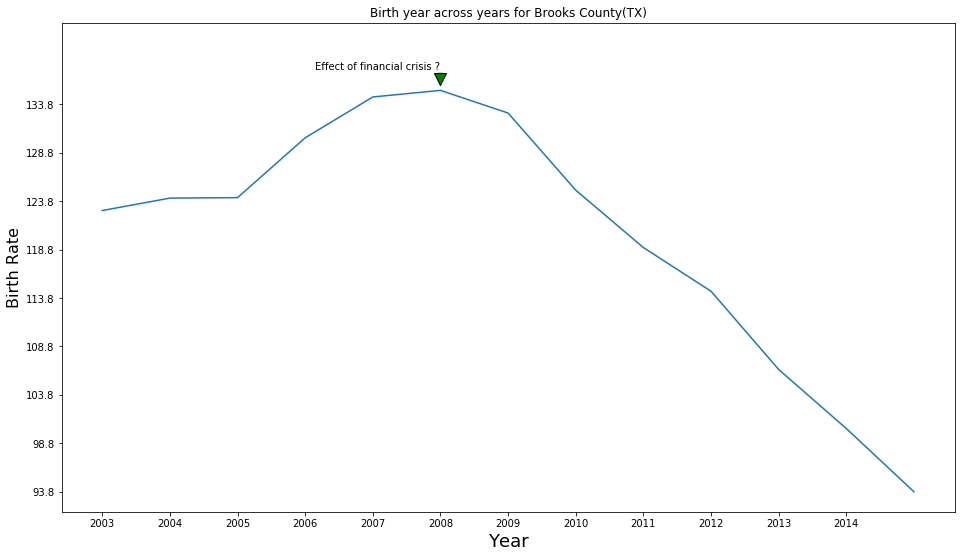

In [36]:
ax = plot_rel_data_v2(brooks_county_data['Birth Rate'], 'Year', 'Birth Rate', 'Birth year across years for Brooks County(TX)', 1, 5)
max_obj = brooks_county_data.loc[brooks_county_data['Birth Rate'].idxmax()]

print(max_obj)
print(max_obj.name, max_obj.State, max_obj.County,max_obj['Birth Rate'])

# Change the top y limit to make sure that annotations are made properly.
ax.set_ylim(top=brooks_county_data['Birth Rate'].max() + 7)
ax.annotate('Effect of financial crisis ?', 
            xy=(int(max_obj.name), max_obj['Birth Rate'] + 0.5),
            xytext=(int(max_obj.name), max_obj['Birth Rate'] + 3),
            arrowprops=dict(facecolor='green'),
            horizontalalignment='right',
            verticalalignment='top'
            )

### Can we average the birth rates across counties(for each state) and see which state has highest/lowest birth rates ?

In [37]:
states_data_agg = \
    teen_birth_rate_data_v2[['Birth Rate']].groupby(
        [teen_birth_rate_data_v2['Year'], teen_birth_rate_data_v2['State']]).mean()

In [38]:
states_data_agg.head()

Birth Rate
Year State                 
2003 Alabama      55.298371
     Alaska       47.083849
     Arizona      63.422178
     Arkansas     64.260899
     California   37.490457

In [39]:
states_data_agg.reset_index(inplace=True)

In [40]:
states_data_agg.head()

,Year,State,Birth Rate
0,2003,Alabama,55.298371
1,2003,Alaska,47.083849
2,2003,Arizona,63.422178
3,2003,Arkansas,64.260899
4,2003,California,37.490457


In [41]:
print(states_data_agg.loc[states_data_agg['Birth Rate'].idxmax()])
print(states_data_agg[states_data_agg['Birth Rate']  == states_data_agg['Birth Rate'].max()])

print(states_data_agg.loc[states_data_agg['Birth Rate'].idxmin()])

Year                 2007
State         Mississippi
Birth Rate        71.6359
Name: 228, dtype: object
     Year        State  Birth Rate
228  2007  Mississippi   71.635909
Year                 2015
State         Connecticut
Birth Rate        10.1347
Name: 618, dtype: object


### Can we plot the states with the maximum and minimum birth rates(Mississippi and Connecticut ) together in one graph ?

In [42]:
states_data_agg.set_index('Year', inplace=True)

In [43]:
miss_data = states_data_agg[['Birth Rate']][states_data_agg['State'] == 'Mississippi']
conn_data = states_data_agg[['Birth Rate']][states_data_agg['State'] == 'Connecticut']
miss_data.head()

,Birth Rate
Year,
2003,66.687151
2004,66.099734
2005,65.702072
2006,69.505884
2007,71.635909


In [44]:
mult_states_data = pd.merge(
    miss_data, 
    conn_data, 
    left_index=True, 
    right_index=True, 
    how='inner', 
    suffixes=['_MISS', '_CONN'])

In [45]:
mult_states_data.head()

,Birth Rate_MISS,Birth Rate_CONN
Year,,
2003,66.687151,20.291578
2004,66.099734,20.271894
2005,65.702072,19.649296
2006,69.505884,19.937525
2007,71.635909,19.843856


       Birth Rate_MISS  Birth Rate_CONN
count        13.000000        13.000000
mean         59.983868        16.481804
std          10.462246         3.852510
min          40.755451        10.134712
25%          53.020620        13.468094
50%          65.702072        18.058187
75%          66.868829        19.843856
max          71.635909        20.291578


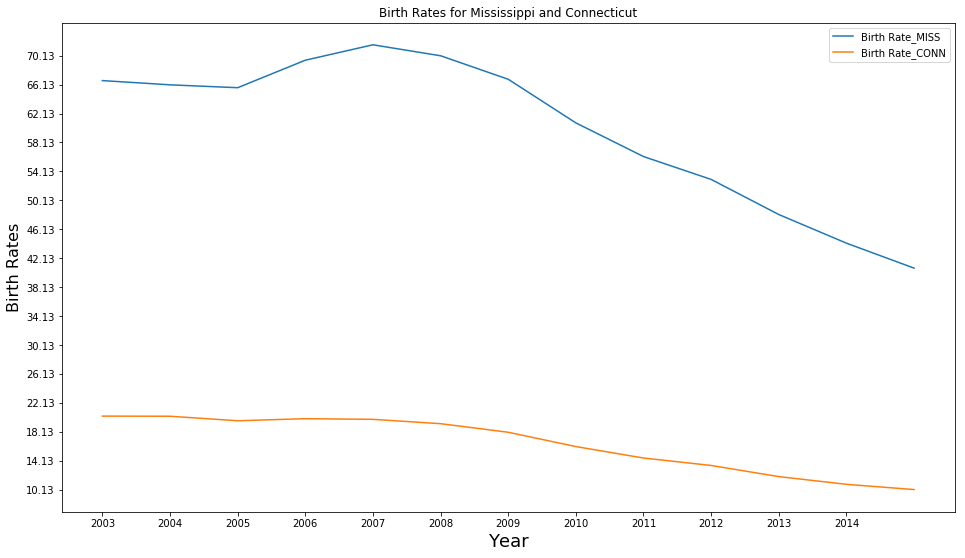

In [46]:
plot_rel_data_v2(mult_states_data, 'Year', 'Birth Rates', 'Birth Rates for Mississippi and Connecticut', 1, 4)

### Can we plot data for entire USA ?

In [50]:
# We can aggregate data in the exact same manner as we did for individual states.
entire_usa_data = teen_birth_rate_data_v2[['Birth Rate']].groupby(teen_birth_rate_data_v2['Year']).mean()
#entire_usa_data.set_index('Year', inplace=True)
entire_usa_data

,Birth Rate
Year,
2003,45.754650
2004,45.154530
2005,44.422941
2006,46.138379
2007,47.129863
2008,46.327473
2009,44.318616
2010,40.576560
2011,37.760967


       Birth Rate
count   13.000000
mean    40.319738
std      6.745969
min     27.808011
25%     35.903418
50%     44.318616
75%     45.754650
max     47.129863


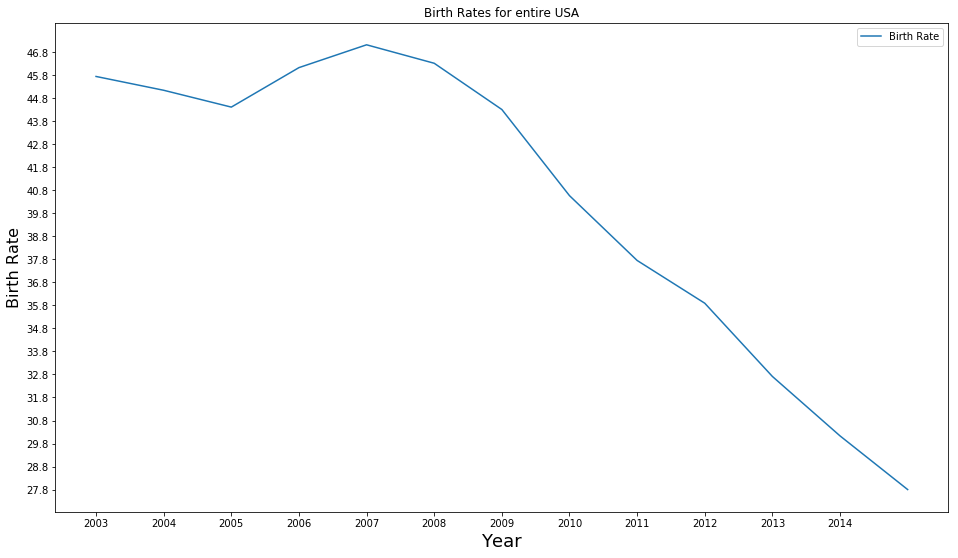

In [52]:
plot_rel_data_v2(entire_usa_data, 'Year', 'Birth Rate', 'Birth Rates for entire USA', 1 , 1)

### Can we decipher something statistically significant from this dataset ?

#### The conclusions are similar to that of project 1. The data present here does not look to be sufficient enough to 
#### provide a useful result that is statistically significant.